### Desafio de negócio

O LIT faz personalização do ensino com o "Paul", o primeiro tutor do mundo a utilizar a tecnologia de Inteligência Artificial IBM Watson para potencializar a aprendizagem e também a personalização, visando ajudar o aluno a estudar da forma mais adequada para absorver o máximo de conteúdo possível sem desfocar do que ele realmente deve aprender, eliminando assim conteúdos que o aluno já sabe.

Nesse Desafio de Segmentação de Mercado, os participantes deverão dividir por segmentos comportamentais e por competências os alunos do LIT, para gerar uma experiência na plataforma ainda mais personalizada.

Para tanto, neste desafio deverá ser desenvolvido uma solução tecnológica para segmentar os alunos por comportamento e competências.

Do ponto de vista comportamental, os alunos deverão ser divididos em 6 grupos a partir da interação do aluno ao longo de sua jornada no LIT. Cada perfil busca medir o grau de esforço do aluno dentro do progama educacional e qual a melhor jornada para o estudante.

Com a introdução de um novo processo de onboarding na plataforma, teemos a oportunidade de utilizar os dados preenchidos pelos alunos para fazer uma melhor recomendação de quais dos mais 150 cursos do LIT, o aluno deveria se matricular, focando em seus interesses e responsabilidades.

Sendo assim, esperamos poder indicar para cada aluno do LIT quais são os cursos ideais para ele, de acordo com as competências que eles precisam desenvolver para a sua carreira. Esperamos também durante a sua jornada de aprendizagem no LIT, gerar ações de engajamento de acordo com sua atividade na plataforma.


### Objetivo

Neste desafio, você deverá utilizar um jupyter notebook para criar um modelo de aprendizado de máquina capaz, com base nas variáveis fornecidas no dataset, identificar o que define o perfil de cada aluno para poder realizar previsões sobre futuros alunos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import statistics as st
import itertools

#Libs de Machine Learning - Decision Tree, Random Forest e KKN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [3]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [4]:
df = pd.read_csv('training_dataset.csv')

In [5]:
df.head()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,perfil6
1,183037660.0,MBA,NaN,Supervisor,e-commerce,0.0,0.0,1.0,6.0,NaN,66.0,36.0,34.0,0.0,perfil2
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,perfil2
3,398921329.0,SEM FORMAÇÃO,UFRN,Outros,Eletroeletronicos,NaN,1.0,1.0,5.0,Instagram,29.0,10.0,6.0,0.0,perfil5
4,522842284.0,Tecnólogo,INSPER INSTITUTO DE ENSINO E PESQUISA,SEM EXPERIÊNCIA,Eletrodomesticos,NaN,0.0,1.0,7.0,Google,67.0,49.0,44.0,0.0,perfil2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
id                            13945 non-null float64
graduacao                     13950 non-null object
universidade                  13920 non-null object
profissao                     13977 non-null object
organizacao                   13961 non-null object
pretende_fazer_cursos_lit     13989 non-null float64
interesse_mba_lit             14003 non-null float64
importante_ter_certificado    13918 non-null float64
horas_semanais_estudo         13959 non-null float64
como_conheceu_lit             13915 non-null object
total_modulos                 13987 non-null float64
modulos_iniciados             14044 non-null float64
modulos_finalizados           13924 non-null float64
certificados                  13979 non-null float64
categoria                     15857 non-null object
dtypes: float64(9), object(6)
memory usage: 1.8+ MB


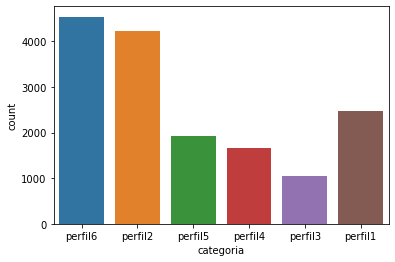

In [7]:
#Antes do balanceamento
ax = sns.countplot(x=df["categoria"], data=df)

In [8]:
#Verificar os elementos unicos de cada coluna
#df['graduacao'].unique()
#df['universidade'].unique()
#df['profissao'].unique()
#df['organizacao'].unique()
#df['como_conheceu_lit'].unique()

In [9]:
#Inicio do pré-processamento de dados
#Formatando a coluna "categoria" em valores númericos para que possamos utilizar no algoritmo de machine learning
df_processado = df.copy()
df_processado["categoria"] = df_processado["categoria"].map({"perfil1": 1, "perfil2": 2, "perfil3": 3, "perfil4": 4, "perfil5": 5, "perfil6": 6})
df_processado["graduacao"] = df_processado["graduacao"].map({"Especialização": 1, "MBA": 2, "Bacharelado": 3, "SEM FORMAÇÃO": 4, "Tecnólogo": 5, "Licenciatura": 6})
df_processado["universidade"] = df_processado["universidade"].map({"UNIP": 1, "UNICAMP": 2, "UFRN": 3, "INSPER INSTITUTO DE ENSINO E PESQUISA": 4, "UEPB": 5, "FGV-RJ": 6, "UNIVERSIDADE NOVE DE JULHO": 7, "USP": 8, "UNIVERSIDADE PRESBITERIANA MACKENZIE": 9, "UFSCar": 10, "Universidade Metodista de Sao Paulo": 11, "Escola Paulista de Direito": 12, "FACULDADE ANHANGUERA": 13, "UFF": 14, "UFPE": 15, "CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ": 16, "UNIVERSIDADE CRUZEIRO DO SUL": 17, "FATEC": 18, "UNIVERSIDADE ESTADUAL DE PONTA GROSSA": 19, "UFRJ": 20, "Unesp": 18})
df_processado["profissao"] = df_processado["profissao"].map({"Analista Senior": 1, "Supervisor": 2, "Outros": 3, "SEM EXPERIÊNCIA": 4, "Advogado": 5, "Assessor": 6, "Engenheiro": 7, "Gerente": 8, "Analista": 9, "Diretor": 10,"Coordenador": 11, "Sócio/Dono/Proprietário": 12})
df_processado["organizacao"] = df_processado["organizacao"].map({"Eletrodomesticos": 1, "e-commerce": 2, "Eletroeletronicos": 3, "Montadora": 4, "Entretenimento": 5, "Oleo e Gas": 6, "Siderurgica": 7, "servicos": 8, "Estado": 9, "Borracha": 10, "Laminados": 11})
df_processado["como_conheceu_lit"] = df_processado["como_conheceu_lit"].map({"Google": 1, "Saint Paul": 2, "Instagram": 3, "Mídia (revista/jornal/web)": 4, "Outros": 5, "Facebook": 6, "Minha empresa - benefício LITpass": 7, "Linkedin": 8, "YouTube": 9})

In [10]:
#Verificando valores nulos
#df_processado.isnull().sum()
df_processado.dropna(inplace = True)


In [11]:
df_processado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2691 entries, 0 to 15848
Data columns (total 15 columns):
id                            2691 non-null float64
graduacao                     2691 non-null float64
universidade                  2691 non-null float64
profissao                     2691 non-null float64
organizacao                   2691 non-null float64
pretende_fazer_cursos_lit     2691 non-null float64
interesse_mba_lit             2691 non-null float64
importante_ter_certificado    2691 non-null float64
horas_semanais_estudo         2691 non-null float64
como_conheceu_lit             2691 non-null float64
total_modulos                 2691 non-null float64
modulos_iniciados             2691 non-null float64
modulos_finalizados           2691 non-null float64
certificados                  2691 non-null float64
categoria                     2691 non-null int64
dtypes: float64(14), int64(1)
memory usage: 336.4 KB


In [12]:
#Transformando as colunas categoricas para colunas com valores númericos para que possamos usar no nosso mod
df_processado = pd.get_dummies(df_processado)
df_processado.head()



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,915132186.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,28.0,5.0,4.0,0.0,6
2,681614019.0,3.0,2.0,3.0,2.0,1.0,1.0,1.0,10.0,2.0,27.0,27.0,27.0,0.0,2
9,408435481.0,3.0,7.0,8.0,6.0,0.0,0.0,1.0,9.0,5.0,51.0,49.0,49.0,0.0,2
11,868804832.0,6.0,3.0,5.0,6.0,0.0,0.0,1.0,2.0,6.0,10.0,3.0,1.0,0.0,6
15,862585285.0,1.0,8.0,11.0,9.0,1.0,1.0,1.0,4.0,5.0,36.0,20.0,19.0,0.0,3


In [13]:
#Aplicando o SMOTE para gerar dados sintéticos 

#Copiando o df_processado e dropando a coluna categoria
df_processado_x = df_processado.drop("categoria", axis = 1).copy()

#Criando uma series com a coluna categoria
series_categoria = df_processado.categoria

#Utilizando o SMOTE, ele cria dados sintéticos com a classe minoritária até obter o mesmo volume da classe majoritária
smt = SMOTE()

#Aplicando SMOTE
df_processado_x, series_categoria = smt.fit_sample(df_processado_x, series_categoria)

#Verificar a equalização das classes
np.bincount(series_categoria)

array([  0, 739, 739, 739, 739, 739, 739], dtype=int64)

In [14]:
#Realizando o Split dos dados em dados de treino e teste
#Estou utilizando 30% do dataset para teste e o restante para treino.
x_train, x_test, y_train, y_test = train_test_split(df_processado_x, series_categoria, test_size=0.30, random_state = 1)


In [15]:
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

### Aplicação do algoritmo - Decision Tree

In [16]:
# Aplicando a Decision Tree e apresentando as métricas
dtc_model = DecisionTreeClassifier(max_depth=15).fit(x_train, y_train)

#Realizando a predição de y para os dados de test x.
y_pred_dtc = dtc_model.predict(x_test)
print (classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.77      0.72      0.75       233
           2       0.64      0.66      0.65       219
           3       0.76      0.74      0.75       223
           4       0.74      0.76      0.75       194
           5       0.69      0.74      0.71       232
           6       0.74      0.71      0.73       230

    accuracy                           0.72      1331
   macro avg       0.72      0.72      0.72      1331
weighted avg       0.72      0.72      0.72      1331



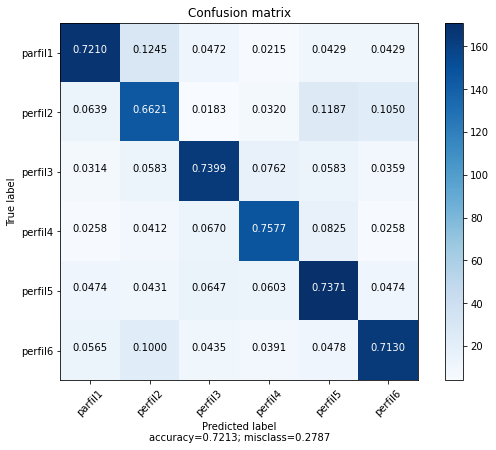

In [17]:
#Plotando a matrix de confusão
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dtc), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

### Aplicação do algoritmo - Random Forest

In [18]:
rft_model = RandomForestClassifier(max_depth=15, random_state=0).fit(x_train, y_train)

#Realizando a predição de y para os dados de test x.
y_pred_rft = rft_model.predict(x_test)
print (classification_report(y_test, y_pred_rft))
0.86, 0.81, 0.83, 0.80, 0.82, 0.86

              precision    recall  f1-score   support

           1       0.82      0.88      0.85       233
           2       0.79      0.80      0.80       219
           3       0.88      0.78      0.83       223
           4       0.80      0.85      0.83       194
           5       0.81      0.75      0.78       232
           6       0.84      0.88      0.86       230

    accuracy                           0.82      1331
   macro avg       0.83      0.83      0.82      1331
weighted avg       0.83      0.82      0.82      1331



(0.86, 0.81, 0.83, 0.8, 0.82, 0.86)

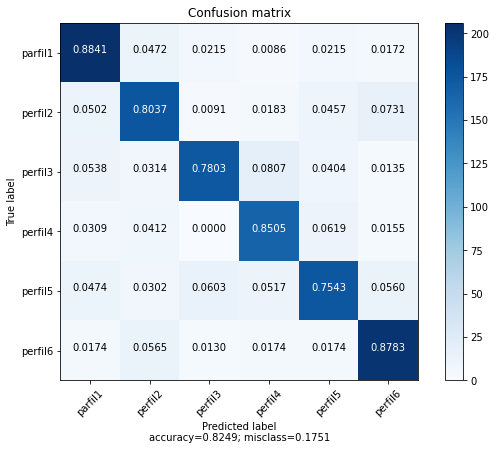

In [19]:
#Plotando a matrix de confusão
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rft), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

### Aplicação do algoritmo - KNN

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)  
#Realizando a predição de y para os dados de test x.
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           1       0.72      0.79      0.76       233
           2       0.57      0.43      0.49       219
           3       0.54      0.76      0.63       223
           4       0.45      0.59      0.51       194
           5       0.48      0.43      0.45       232
           6       0.48      0.29      0.36       230

    accuracy                           0.55      1331
   macro avg       0.54      0.55      0.53      1331
weighted avg       0.54      0.55      0.53      1331



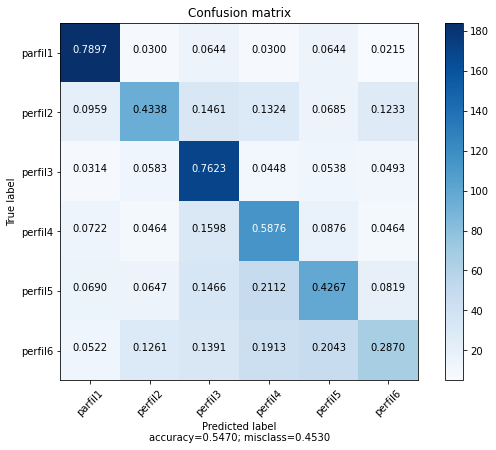

In [21]:
#Plotando a matrix de confusão
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

### Métricas 
Analisando o F1 score de cada um dos modelos Decision Tree, Random Forest e KNN.



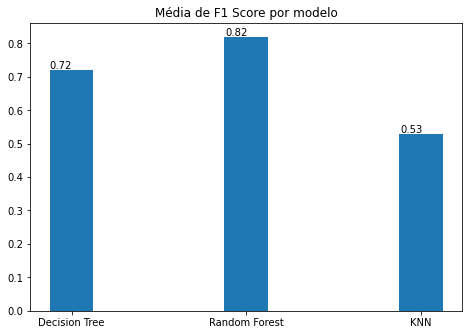

In [45]:
#Decision Tree
dtc_f1_score = round(f1_score(y_test, y_pred_dtc, average= "macro"), 2)

#Random Forest
rft_f1_score = round(f1_score(y_test, y_pred_rft, average= "macro"),2) 

#KNN
knn_f1_score = round(f1_score(y_test, y_pred_knn, average= "macro"),2)


metricas = [dtc_f1_score, rft_f1_score, knn_f1_score]
titulos = ["Decision Tree", "Random Forest", "KNN"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(titulos,metricas, width =0.25)
ax.set_title('Média de F1 Score por modelo')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [41]:
#Decision Tree
dtc_desvio = [0.75, 0.65, 0.75, 0.75, 0.71, 0.73]
st.pvariance(dtc_desvio) #variância
st.pstdev(dtc_desvio) #desvio padrao

0.03590109871423002

In [42]:
#Random Forest
rft_desvio = [0.86, 0.81, 0.83, 0.80, 0.82, 0.86]
st.pvariance(rft_desvio) #variância
st.pstdev(rft_desvio) #desvio padrao

0.02309401076758501

In [44]:
#KNN
knn_desvio = [0.76, 0.49, 0.63, 0.51, 0.45, 0.36]
st.pvariance(knn_desvio) #variância
st.pstdev(knn_desvio) #desvio padrao

0.12918548250050735

### Conclusão

Podemos concluir que o modelo de Random Forest possui a maior nota no F1 score comparado aos demais e possui menor desvio padrão entre a nota de suas classes.